In [17]:
# 

import pandas as pd
import seaborn as sns
sns.set()

import re, requests
from bs4 import BeautifulSoup

import datetime
from dateutil.relativedelta import relativedelta

In [20]:
# japanese plot setting

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoGothic.ttf'  #DLしたパスを指定. /font以下でなくても良い
font_prop = FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()

In [8]:
# path

blog_save_dir = '/keyakizaka_mining/data/blog'

# nogizaka46

In [5]:
def get_month_list( start, end ):

    start_dt = datetime.datetime.strptime(start, "%Y%m")
    end_dt = datetime.datetime.strptime(end, "%Y%m")

    lst = []
    t = start_dt
    while t <= end_dt:
        lst.append(t)
        t += relativedelta(months=1)

    return [x.strftime("%Y%m") for x in lst]

def get_nogi_articles_from_single_page( page_soup ):
    
    titles = [ i.find('span', class_='entrytitle').text for i in page_soup.find_all('h1', class_='clearfix') ]
    authors = [ i.text for i in page_soup.find_all('span', class_='author') ]
    datetimes = [ i.text.split('｜')[0].replace(' ','').replace('\n','') for i in page_soup.find_all('div', class_='entrybottom') ]
    page_urls = [ i.find('a').get('href') for i in page_soup.find_all('div', class_='entrybottom') ]
    texts = []
    images = []
    for i, j in enumerate( page_soup.find_all('div', class_='entrybody') ): # 画像URL抽出 ... アドホックな処理多いので注意
        image_urls = []
        for img in j.find_all('img', src=re.compile("^http(s)?://img.nogizaka46.com/blog/")):
            if img.get('src')[-4:] == '.gif':continue
            if not img.get('class') == None:
                if img.get('class')[0] == 'image-embed':
                    continue
            image_urls.append( img.get('src') )
        image_str = ''
        for img in image_urls: image_str += '%s\t'% img
        texts.append( j.text )
        images.append( image_str )

    articles = []
    for i in range( len( titles ) ):
        articles.append( [authors[i], datetimes[i], titles[i], texts[i], images[i], page_urls[i]] )
    
    return articles

headers = {'User-Agent':'Mozilla/5.0'}

start = '201111'
end = '201902'
month_list = get_month_list( start, end )

all_articles = []
for date in month_list:
    print( date )
    target_url = 'http://blog.nogizaka46.com/?p=0&d=%s' % (date)
    r = requests.get(target_url, headers=headers)
    soup = BeautifulSoup(r.text, 'lxml')
    max_page_number = int( soup.find('div', class_='paginate').find_all('a')[-2].text.replace(u"\xa0",u"") ) # これでいいのか?
    for page_idx in range( 1, max_page_number+1, 1 ):
        target_url = 'http://blog.nogizaka46.com/?p=%d&d=%s' % (page_idx, date)
        r = requests.get(target_url, headers=headers)
        soup = BeautifulSoup(r.text, 'lxml')
        page_articles = get_nogi_articles_from_single_page( soup )
        all_articles.extend( page_articles )

201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902


In [6]:
# check

df = pd.DataFrame( all_articles, columns=['author', 'datetime', 'title', 'text', 'images', 'url'] )
print( df.shape )
display( df.head(2) )
display( df.tail(2) )

(13111, 6)


,author,datetime,title,text,images,url
0,中田花奈,2011/11/3023:42,コンベンション2011わずんぬ。,来てくださったかたニコ生見てくださったかたありがとうございます！ 「部活何やってたの？」って...,https://img.nogizaka46.com/blog/photos/uncateg...,http://blog.nogizaka46.com/kana.nakada/2011/11...
1,松村沙友理,2011/11/3014:27,緊張なのだっ♪(o> <o),こんにちりんごっ♪(ｏ・・ｏ)さゆりんごっ(o・・o)\nいきなり質問に答えます!!よろしく...,,http://blog.nogizaka46.com/sayuri.matsumura/20...


,author,datetime,title,text,images,url
13109,斉藤優里,2019/02/0117:50,はじめての旅行地,\n\n\n年始にお休みを頂けたので\n友達と「タイ」旅行に行ってきました乃木坂でタイの観光...,https://img.nogizaka46.com/blog/yuuri.saito/im...,http://blog.nogizaka46.com/yuuri.saito/2019/02...
13110,寺田蘭世,2019/02/0115:54,キイロのYシャツとお下りのピンクのスカート,ザンビ始まりましたね また、色々書きたいところですが全話終えてからですかね改めて感想...,https://img.nogizaka46.com/blog/ranze.terada/i...,http://blog.nogizaka46.com/ranze.terada/2019/0...


In [9]:
# save csv

datetime_str = datetime.datetime.today().strftime("%Y%m%d")
df.to_csv( '%s/nogizaka46_blog_%s.csv' % (blog_save_dir, datetime_str), index=0 )

In [18]:
# read csv

df = pd.read_csv( '%s/nogizaka46_blog_%s.csv' % (blog_save_dir, datetime_str) )

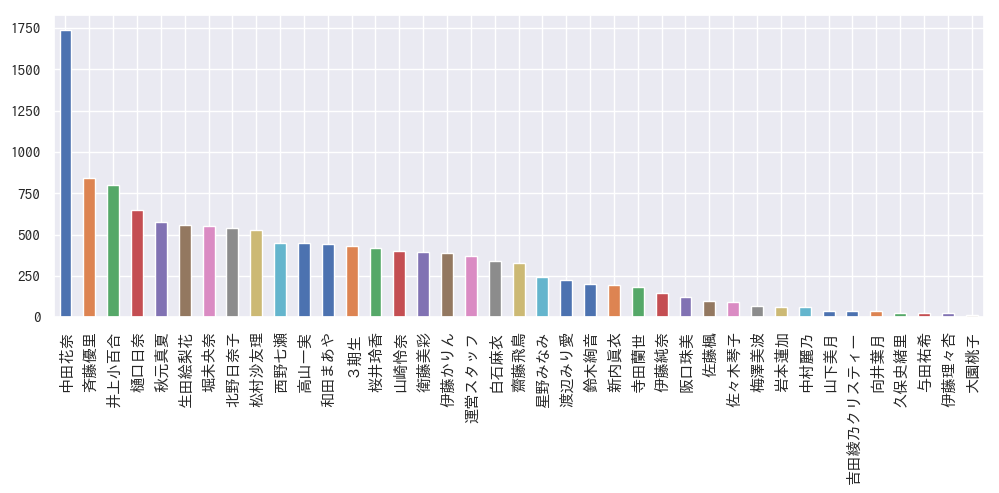

In [21]:
# plot article numbers each author

fig = plt.figure(figsize=(12,4),dpi=100)
df['author'].value_counts().plot(kind='bar')
plt.show()

# keyakizaka46 and hinatazaka46

In [12]:
def get_keyaki_articles_from_single_page( page_soup ):

    articles = []
    for i, j in enumerate( page_soup.select('article') ):
        author = j.p.text.replace(' ','').replace('\n','')
        datetime = j.find('div', class_="box-bottom").li.text.replace(' ','').replace('\n','')
        title = j.find('div', class_="box-ttl").a.text
        body = j.find('div', class_="box-article")
        text = body.text
        page_url = 'http://www.keyakizaka46.com' + j.find('li', class_="singlePage").a.get('href')
        images = ''
        for img in  body.find_all('img'): images += '%s\t'% img.get('src')
        articles.append( [author, datetime, title, text, images, page_url] )    
    return articles

max_page_number = 837 # ...

all_articles = []
for page_idx in range( max_page_number, -1, -1 ):
    if page_idx % 100 == 0: print(page_idx)
    target_url = 'http://www.keyakizaka46.com/s/k46o/diary/member/list?ima=0000&page=%d&cd=member' % page_idx
    r = requests.get(target_url)
    soup = BeautifulSoup(r.text, 'lxml')
    page_articles = get_keyaki_articles_from_single_page( soup )
    all_articles.extend( page_articles )

800
700
600
500
400
300
200
100
0


In [13]:
# check

df = pd.DataFrame( all_articles, columns=['author', 'datetime', 'title', 'text', 'images', 'url'] )
print( df.shape )
display( df.head(2) )
display( df.tail(2) )

(16754, 6)


,author,datetime,title,text,images,url
0,齋藤冬優花,2015/11/1400:02,＼はじめまして︎︎❤︎︎1/︎︎,\n お見立て会前日にして始まりましたっ!欅坂46ブログ(*ﾟ▽ﾟ)ﾉ嬉しくて嬉しくて、、、...,http://cdn.keyakizaka46.com/files/14/diary/k46...,http://www.keyakizaka46.com/s/k46o/diary/detai...
1,菅井友香,2015/11/1323:54,菅井友香です(^ ^),\n初めまして(^ ^)!この度欅坂46として活動させて頂けることになりました、東京都出身1...,http://cdn.keyakizaka46.com/files/14/diary/k46...,http://www.keyakizaka46.com/s/k46o/diary/detai...


,author,datetime,title,text,images,url
16752,井口眞緒,2019/02/1600:27,IDOL_AND_READさん,\n\n\n3月13日発売の\nIDOL AND READさんで\n裏表紙をさせていただきま...,http://cdn.keyakizaka46.com/images/14/0c6/eeb4...,http://www.keyakizaka46.com/s/k46o/diary/detai...
16753,石森虹花,2019/02/1600:24,にじいろ。①④⑤,\n\n\n\nこんばんわん🐶\n\n\n\n金曜日🌟\n1週間お疲れ様です😌\n\n\n\...,http://cdn.keyakizaka46.com/images/14/ce8/5cdd...,http://www.keyakizaka46.com/s/k46o/diary/detai...


In [14]:
# save csv

datetime_str = datetime.datetime.today().strftime("%Y%m%d")
df.to_csv( '%s/keyakizaka46_blog_%s.csv' % (blog_save_dir, datetime_str), index=0 )

In [23]:
# read csv

df = pd.read_csv( '%s/keyakizaka46_blog_%s.csv' % (blog_save_dir, datetime_str) )

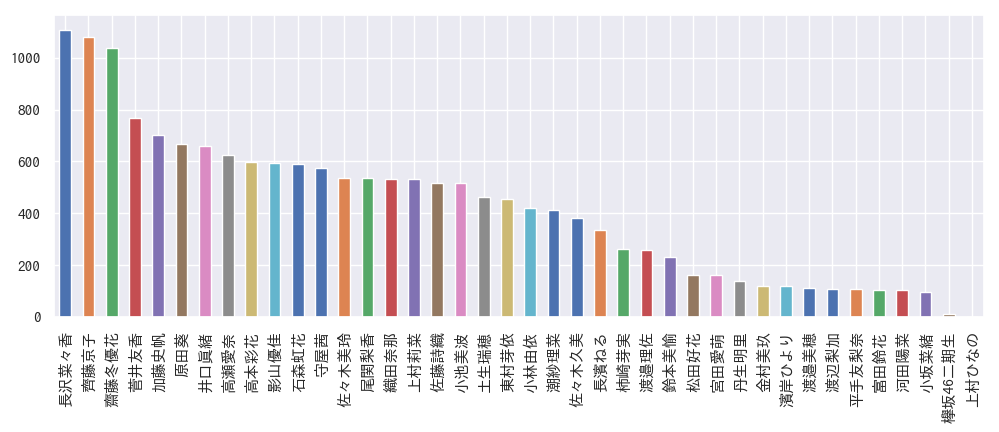

In [24]:
# plot article numbers each author

fig = plt.figure(figsize=(12,4),dpi=100)
df['author'].value_counts().plot(kind='bar')
plt.show()